In [92]:
import os
import math
import numpy as np
import cv2 as cv
import random
from matplotlib import pyplot as plt

In [93]:
cwd = os.getcwd()

In [52]:
def getArray(file):
    with open(file, "r") as f:
        data = f.readlines()
        data = [data[x].strip().split(",") for x in range(1, len(data))]
        data = [[float(x) for x in row] for row in data]
        return np.array(data)

In [53]:
def homographyPairs(src_pts, dst_pts):
    dstPoints, srcPoints = [], []

    src_pts = src_pts[src_pts[:, 0].argsort()]
    dst_pts = dst_pts[dst_pts[:, 0].argsort()]

    for row1 in dst_pts:
        for row2 in src_pts:
            if row1[0] == row2[0]:
                dstPoints.append(row1[1:])
                srcPoints.append(row2[1:])

    return np.array(srcPoints), np.array(dstPoints)

In [54]:
def normalization(data):
    mean = data.mean(axis=0)
    centr = data - mean
    # std = np.sqrt(np.sum((centr)*(centr), axis=1)).sum()/len(data)
    _xs, _ys = centr[:, 0], centr[:, 1]

    Sxx, Syy, Sxy = (_xs.T @_xs)/len(_xs), (_ys.T @ _ys)/len(_ys), (_xs.T @_ys)/len(_xs)

    std = np.sqrt(Sxx*Syy - Sxy**2)
    
    transorm = np.array([
        [1, 0, -mean[0]],
        [0, 1, -mean[1]],
        [0, 0, std]   
    ])/std

    _data = np.append(data, np.ones((len(data), 1)), axis=1)
    _data = transorm@_data.T
    # print(_data.T[:,:2])
    # print(_data.T)
    return _data.T[:,:2], transorm

In [55]:
def getPoints(homography, data):
    data = np.append(data, np.ones((len(data), 1)), axis=1)

    tr_data = (homography @ data.T).T

    for i in range(tr_data.shape[1]):
        tr_data[:, i] = tr_data[:,i]/ tr_data[:,tr_data.shape[1]-1]
    tr_data = tr_data[:, :2]

    return tr_data

In [56]:
def finderror(homography, test, true):

    pred = getPoints(homography, test)
    error = true-pred
    sq_err = np.sqrt(np.sum(error * error, axis=1))/len(test)
    return np.sum(sq_err)/len(sq_err)

In [57]:
def getHomographyPairs(lidar_data, image_points):
    homography_pairs = []
    for i, image_point in enumerate(image_points):
        print("-"*10)
        src, dst = homographyPairs(image_point, lidar_data)
        norm_src, mat_src = normalization(src)
        norm_dst, mat_dst = normalization(dst)
        
        M1, mask1 = cv.findHomography(norm_src, norm_dst, cv.RANSAC, 0.05, maxIters=100000)
        M2, mask2 = cv.findHomography(src, dst, cv.RANSAC, 0.05, maxIters=100000)
        print(f"{i}:- for normalized data", mask1.ravel().tolist())
        print(f"{i}:- for non normalized data", mask2.ravel().tolist())

        homography1 = np.linalg.inv(mat_dst) @ M1 @mat_src
        homography2 = M2

        print("error after normalization", finderror(homography1, src, dst))
        print("error without normalization", finderror(homography2, src, dst))

        homography_pairs.append([homography1, homography2])

    return np.array(homography_pairs)


In [58]:
def plot(X, y, label, X1, y1, label1, X2, y2, label2, X3, y3, label3, X4, y4, label4, X5, y5, label5, X6, y6, label6):
    # Predict data of estimated models

    plt.figure(figsize=(28,28))


    plt.scatter(
        X, y, color="green", marker="+", label="lidar"
    )
    for i, txt in enumerate(label):
        plt.annotate(str(txt), (X[i], y[i]))


    plt.scatter(
        X1, y1, color="blue", marker=".", label="cam1"
    )
    for i, txt in enumerate(label1):
        plt.annotate(str(txt), (X1[i], y1[i]))


    plt.scatter(
        X2, y2, color="red", marker=".", label="cam2"
    )
    for i, txt in enumerate(label2):
        plt.annotate(str(txt), (X2[i], y2[i]))


    plt.scatter(
        X3, y3, color="orange", marker=".", label="cam3"
    )
    for i, txt in enumerate(label3):
        plt.annotate(str(txt), (X3[i], y3[i]))


    plt.scatter(
        X4, y4, color="yellow", marker=".", label="cam4"
    )
    for i, txt in enumerate(label4):
        plt.annotate(str(txt), (X4[i], y4[i]))


    plt.scatter(
            X5, y5, color="pink", marker=".", label="cam5"
        )
    for i, txt in enumerate(label5):
        plt.annotate(str(txt), (X5[i], y5[i]))


    plt.scatter(
            X6, y6, color="black", marker=".", label="cam6"
        )
    for i, txt in enumerate(label6):
        plt.annotate(str(txt), (X6[i], y6[i]))



    plt.axis('scaled')
    plt.legend(loc="lower right")
    plt.xlabel("X--->")
    plt.ylabel("Y--->")
    plt.show()


In [59]:
lidar_data = getArray("intersections.txt")
sanjit_sir = getArray("new_rectified_data/rectified_csv/points00.csv")
saket_sir = getArray("new_rectified_data/rectified_csv/points01.csv")
middle = getArray("new_rectified_data/rectified_csv/points02.csv")
discussion = getArray("new_rectified_data/rectified_csv/points03.csv")
lcslab1 = getArray("new_rectified_data/rectified_csv/points04.csv")
lcslab2 = getArray("new_rectified_data/rectified_csv/points05.csv")


ld, sk, sa = lidar_data[:,0], sanjit_sir[:,0], saket_sir[:,0], 

ld_sa = np.intersect1d(ld, sa).shape
ld_sk = np.intersect1d(ld, sk).shape

ld, sk, sa, ld_sk, ld_sa

(array([ 1.,  2.,  4.,  5.,  6.,  7.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17., 19., 20., 21., 22., 25., 27., 28., 30., 31., 32., 34.,
        35., 37., 40., 41., 42., 43., 44., 46., 47., 48., 49., 50., 51.,
        53., 55., 56., 57., 61., 62., 63., 64., 66., 67., 68., 69., 70.,
        71., 72., 73., 74., 75., 76., 77., 80., 82., 84.]),
 array([-11., -12., -21., -22.,   1.,   2.,   3.,   4.,   5.,  21.,  22.,
         23.,  24.,  25.,  26.,  28.,  29.,  32.,  84.,  85.]),
 array([-11., -12., -21., -22.,   5.,   6.,   7.,   8.,   9.,  24.,  25.,
         27.,  29.,  30.,  31.,  34.,  35.,  36.,  37.,  38.,  39.]),
 (10,),
 (11,))

In [60]:
homography_pairs = getHomographyPairs(lidar_data, [sanjit_sir, saket_sir, middle, discussion, lcslab1, lcslab2])
homography_pairs

----------
0:- for normalized data [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
0:- for non normalized data [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
error after normalization 0.0005970013440609028
error without normalization 0.0005690833639860652
----------
1:- for normalized data [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1]
1:- for non normalized data [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
error after normalization 0.0009291810596972456
error without normalization 0.0008550866707617671
----------
2:- for normalized data [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
2:- for non normalized data [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
error after normalization 0.0010414334435677928
error without normalization 0.0006314627533720578
----------
3:- for normalized data [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
3:- for non normalized data [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
error after normalization 0.000720077227933615
error without normalization 0.000720076442412178
----------
4:- for normalized data [1, 1, 1, 0, 1,

array([[[[ 1.05670341e-03,  2.76883847e-03, -2.86900095e+00],
         [ 3.72541848e-03, -2.13889873e-03, -8.77753839e+00],
         [-1.22827102e-04,  1.49203462e-04,  9.95510434e-01]],

        [[ 1.04847926e-03,  2.75678903e-03, -2.85382726e+00],
         [ 3.69109792e-03, -2.00637955e-03, -8.79577370e+00],
         [-1.19365398e-04,  1.29828125e-04,  1.00000000e+00]]],


       [[[ 1.84250211e-04,  3.02817449e-03, -2.00987618e+00],
         [ 2.69471705e-03, -1.76457993e-04, -5.90710220e+00],
         [ 8.12042453e-05, -1.08290314e-05,  9.42381260e-01]],

        [[ 2.03254696e-04,  3.31128815e-03, -2.19932919e+00],
         [ 2.92420988e-03, -4.00665990e-04, -6.35205526e+00],
         [ 9.75177346e-05,  4.53072137e-05,  1.00000000e+00]]],


       [[[ 2.38458842e-05,  3.00649175e-03, -1.78730054e+00],
         [ 2.86397365e-03, -1.91929362e-04, -3.19035704e+00],
         [ 7.72921290e-05,  1.20496415e-04,  8.64160790e-01]],

        [[ 2.93828430e-05,  3.59833864e-03, -2.13884757e

In [61]:
homography_pairs[5][0]

array([[-3.82221787e-04,  3.04131280e-03, -1.05493313e+00],
       [ 2.80360898e-03,  8.92130139e-04,  1.72356941e+00],
       [-3.86732918e-05,  1.19632368e-04,  9.56462847e-01]])

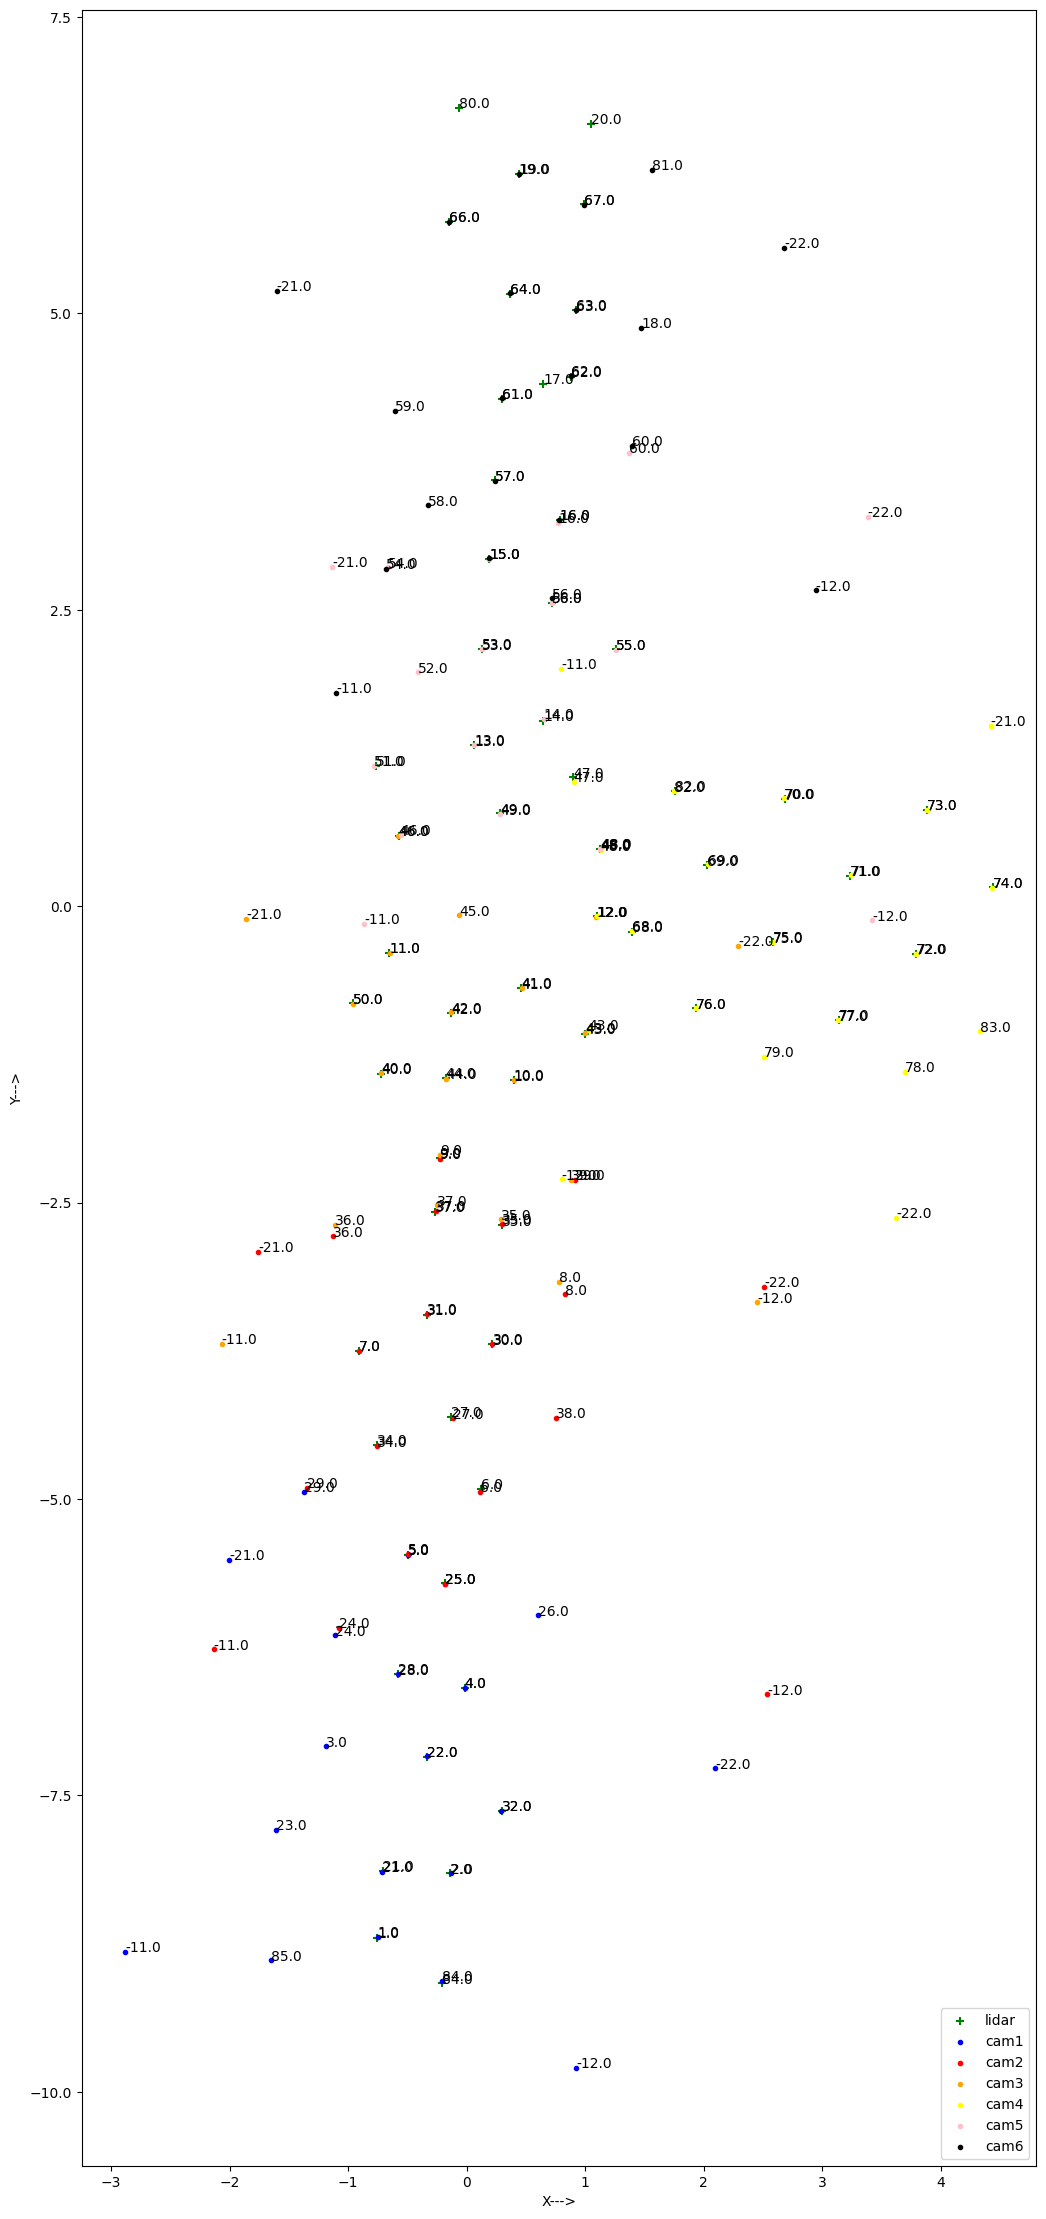

In [63]:
im_sanjit_sir = sanjit_sir[:, 1:]
im_saket_sir = saket_sir[:, 1:]
im_middle = middle[:, 1:]
im_discussion = discussion[:, 1:]
im_lcslab1 = lcslab1[:, 1:]
im_lcslab2 = lcslab2[:, 1:]

label1, label2, label3, label4, label5, label6 = sanjit_sir[:,0], saket_sir[:, 0], middle[:, 0], discussion[:, 0], lcslab1[:, 0], lcslab2[:, 0]

ld_sanjit_sir = getPoints(homography_pairs[0][0], im_sanjit_sir)
ld_saket_sir = getPoints(homography_pairs[1][0], im_saket_sir)
ld_middle = getPoints(homography_pairs[2][0], im_middle)
ld_discussion = getPoints(homography_pairs[3][0], im_discussion)
ld_lcslab1 = getPoints(homography_pairs[4][0], im_lcslab1)
ld_lcslab2 = getPoints(homography_pairs[5][0], im_lcslab2)

X1, y1 = ld_sanjit_sir[:,0], ld_sanjit_sir[:,1]
X2, y2 = ld_saket_sir[:,0], ld_saket_sir[:,1]
X3, y3 = ld_middle[:,0], ld_middle[:,1]
X4, y4 = ld_discussion[:,0], ld_discussion[:,1]
X5, y5 = ld_lcslab1[:,0], ld_lcslab1[:,1]
X6, y6 = ld_lcslab2[:,0], ld_lcslab2[:,1]

data = None
with open("intersections.txt", "r") as f:
    data = f.readlines()
    data = [data[i].strip().split(",") for i in range(1, len(data))]
    data = [[float(x) for x in row] for row in data ]
data = np.array(data)
label = data[:, 0]
X = data[:, 1]
y = data[:, 2]

plot(X, y, label, 
     X1, y1, label1, 
     X2, y2, label2, 
     X3, y3, label3, 
     X4, y4, label4, 
     X5, y5, label5, 
     X6, y6, label6)

# (X, y, label, X1, y1, label1, X2, y2, label2, X3, y3, label3, X4, y4, label4, X5, y5, label5, X6, y6, label6)


In [64]:
# l-c1,  l-c2, c1-c2

def getError(label1, X1, Y1, label2, X2, Y2):
    errors = []
    for i, lab1 in enumerate(label1):
        err = 0
        for j , lab2 in enumerate(label2):
            
            if lab1 == lab2:
                x1, y1 = X1[i], Y1[i]
                x2, y2 = X2[j], Y2[j]
                err = np.sqrt((x1-x2)**2 + (y1-y2)**2)
        
        errors.append([lab1, err])

    _errors = np.array(errors)
    for i in range(1, 86):
        if i not in _errors[:, 0]:
            errors.append([i, 0])
    return np.array(errors)
            

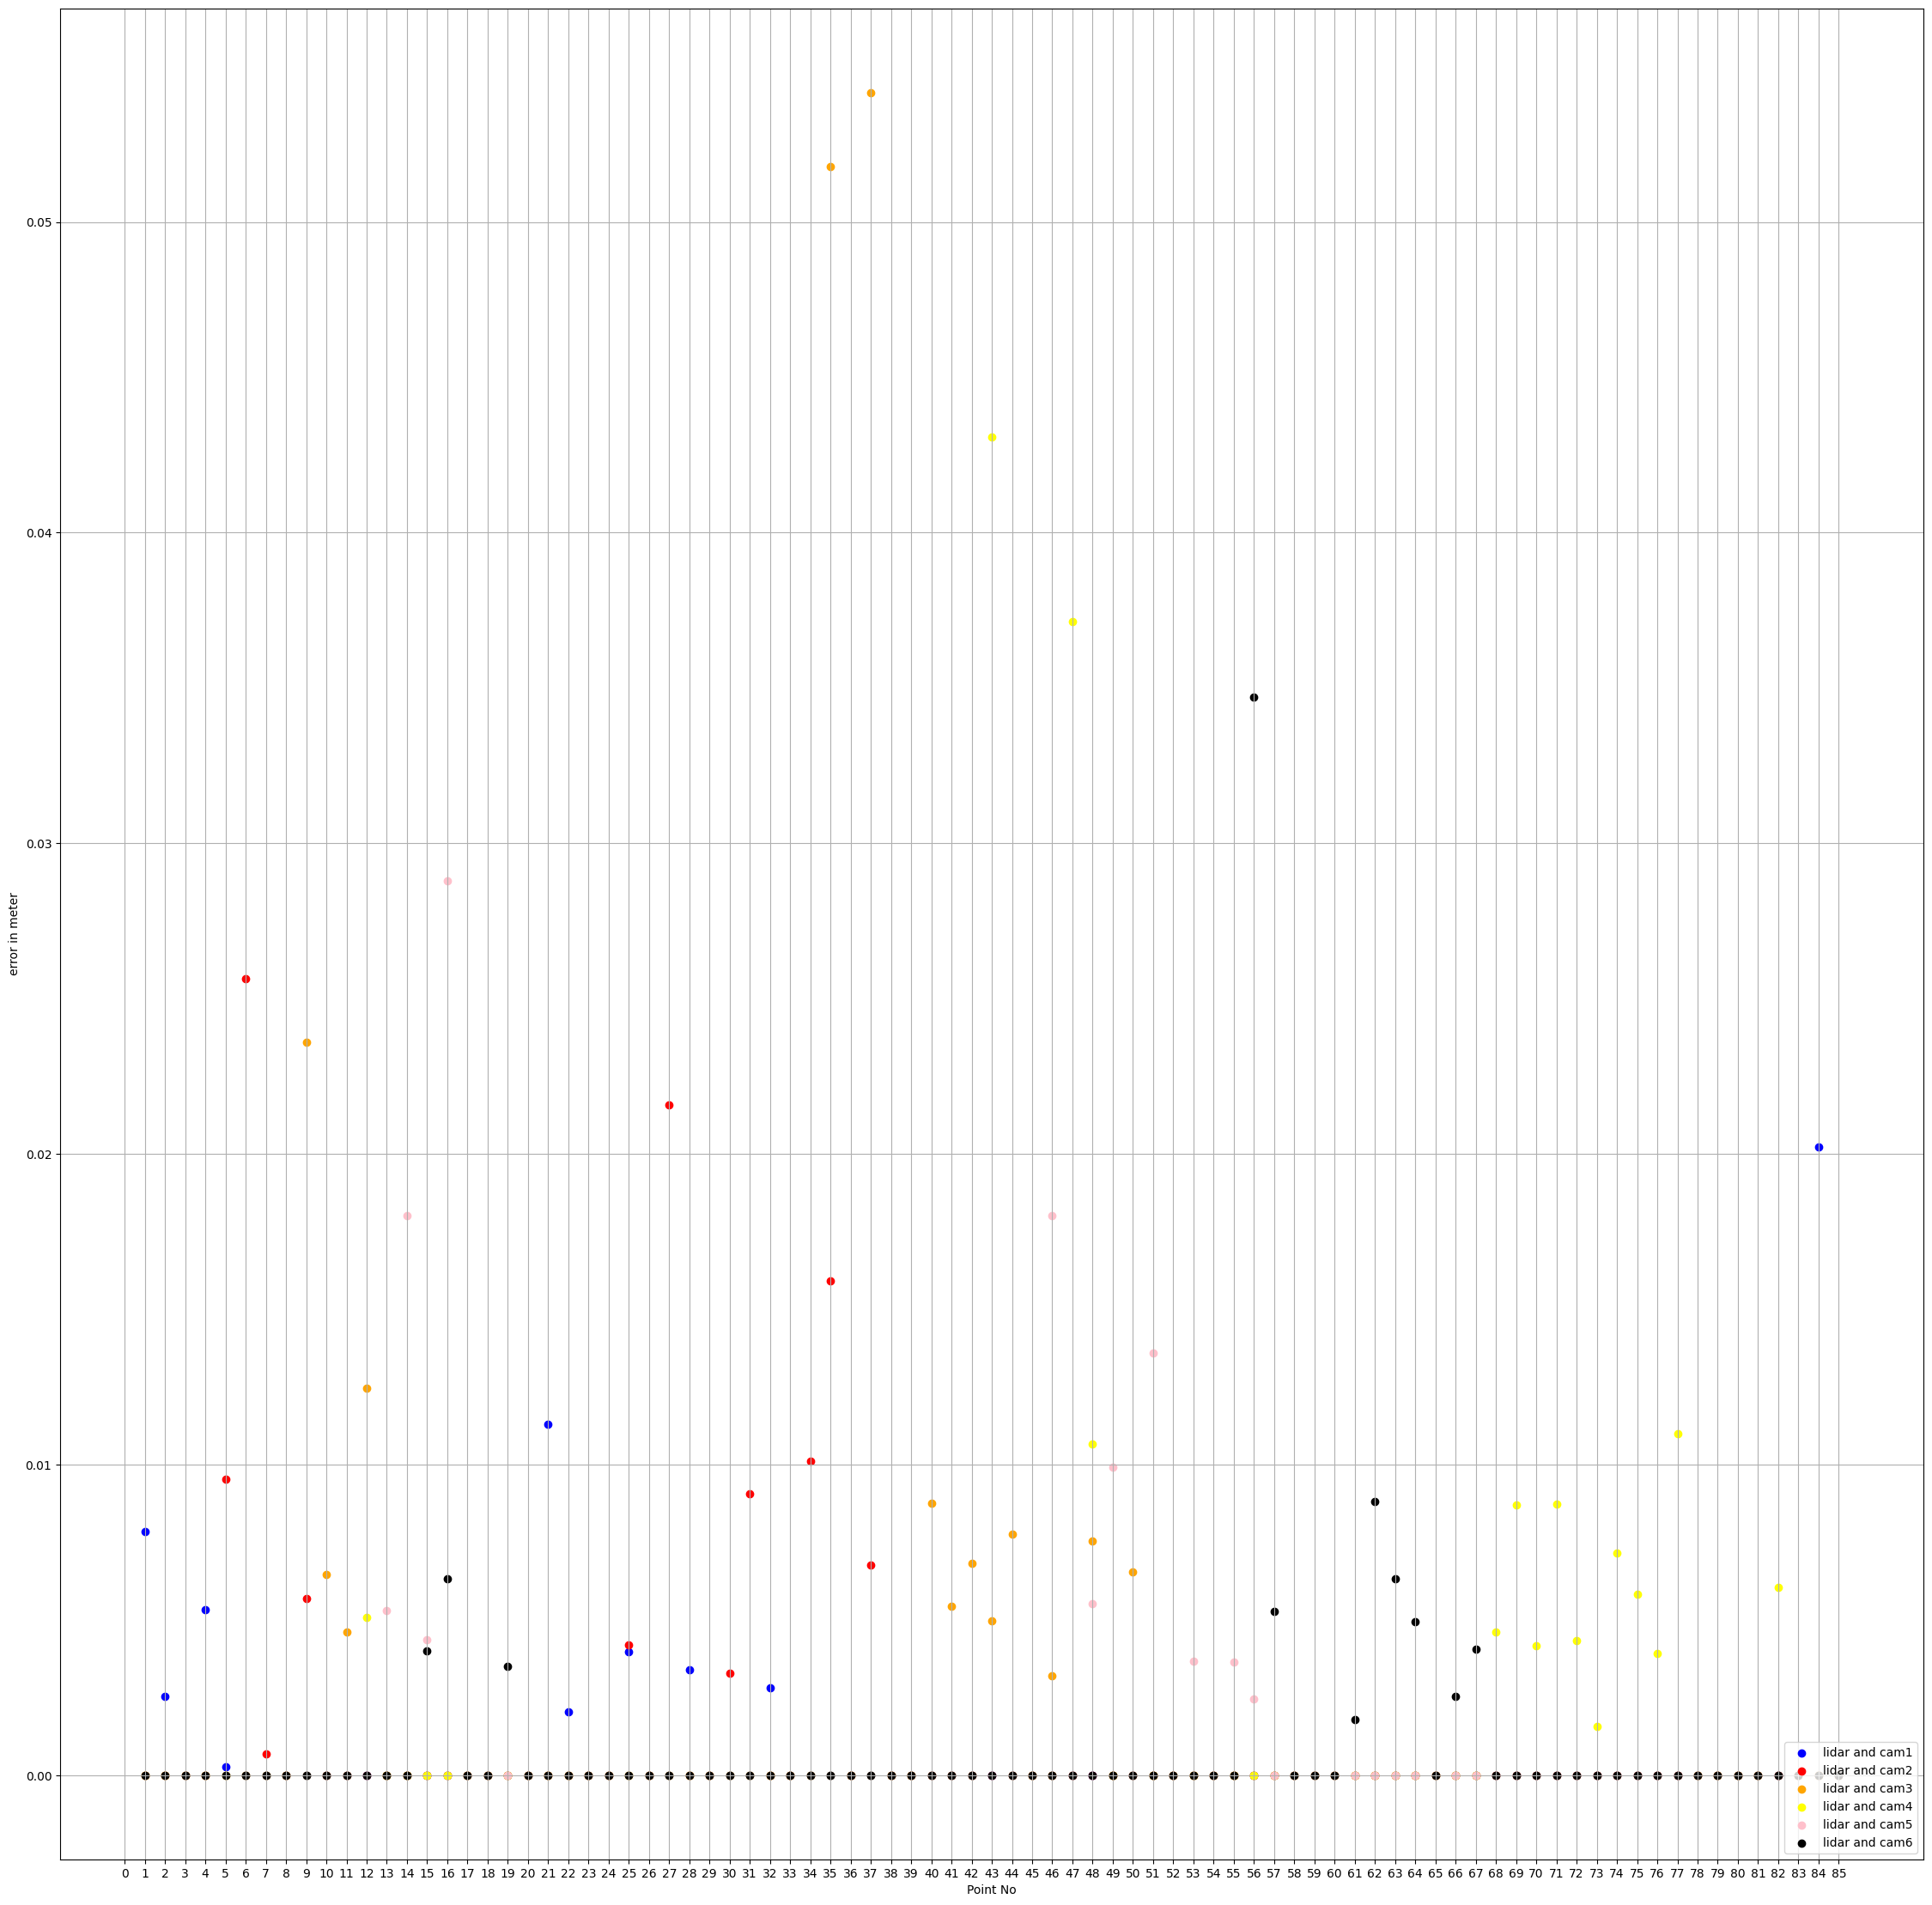

In [65]:
l_c1 = getError(label, X, y, label1, X1, y1)
l_c2 = getError(label, X, y, label2, X2, y2)
l_c3 = getError(label, X, y, label3, X3, y3)
l_c4 = getError(label, X, y, label4, X4, y4)
l_c5 = getError(label, X, y, label5, X5, y5)
l_c6 = getError(label, X, y, label6, X6, y6)


plt.figure(figsize=(28,28))
plt.grid(True)
bins = np.arange(0, 86, 1)
# plt.hist(l_c1[:,1].flatten(), bins=5)
plt.scatter(l_c1[:,0], l_c1[:,1], color="blue", label="lidar and cam1")
plt.scatter(l_c2[:,0], l_c2[:,1], color="red", label="lidar and cam2")
plt.scatter(l_c3[:,0], l_c3[:,1], color="orange", label="lidar and cam3")
plt.scatter(l_c4[:,0], l_c4[:,1], color="yellow", label="lidar and cam4")
plt.scatter(l_c5[:,0], l_c5[:,1], color="pink", label="lidar and cam5")
plt.scatter(l_c6[:,0], l_c6[:,1], color="black", label="lidar and cam6")

plt.legend(loc='lower right')
plt.xticks(bins)
plt.xlabel("Point No")
plt.ylabel("error in meter")
plt.show()

(1080, 1440, 3)


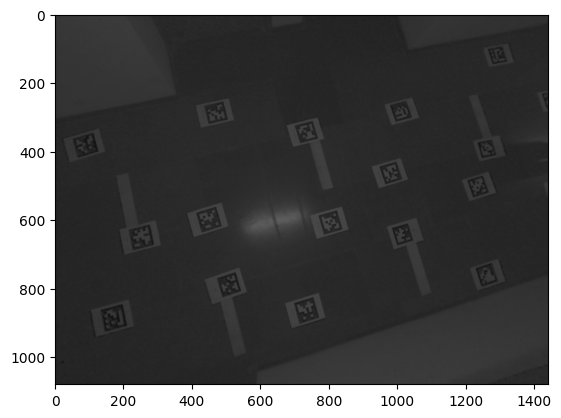

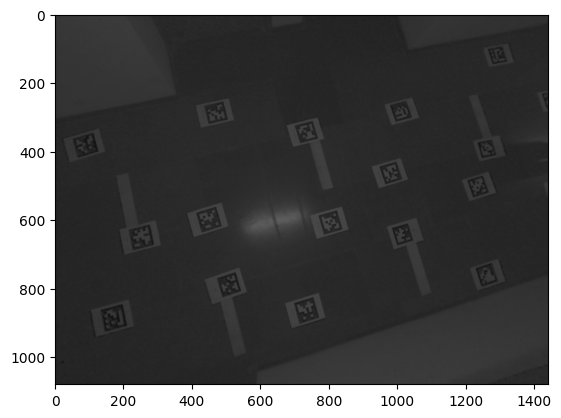

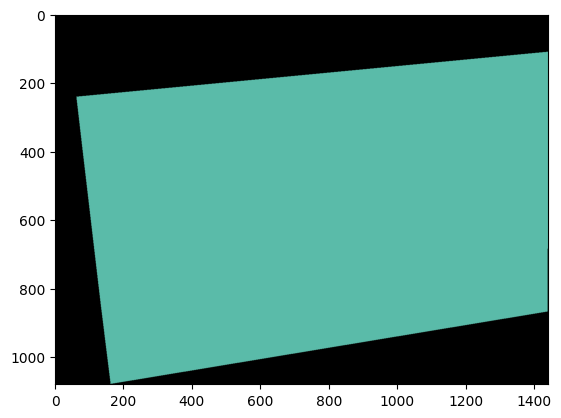

In [70]:
sanjit_sir_img = cv.imread("new_rectified_data/rectified_ar/image00.png")
saket_sir_img = cv.imread("new_rectified_data/rectified_ar/image01.png")
middle_img = cv.imread("new_rectified_data/rectified_ar/image02.png")
discussion_img = cv.imread("new_rectified_data/rectified_ar/image03.png")
lcslab1_img = cv.imread("new_rectified_data/rectified_ar/image04.png")
lcslab2_img = cv.imread("new_rectified_data/rectified_ar/image05.png")
print(sanjit_sir_img.shape)
plt.imshow(sanjit_sir_img)
plt.show()

# sanjit_sir_img = cv.imread("rectified_data/rectified/sanjitsir.png")
# saket_sir_img = cv.imread("rectified_data/rectified/saketsir.png")
# middle_img = cv.imread("rectified_data/rectified/middle.png")
# discussion_img = cv.imread("rectified_data/rectified/discussion.png")
# lcslab1_img = cv.imread("rectified_data/rectified/lcslab1.png")
# lcslab2_img = cv.imread("rectified_data/rectified/lcslab2.png")
# print(sanjit_sir_img.shape)

sanjit_sir_mask = cv.imread("new_rectified_data/masks/sanjitsir_ar_rectified_mask.png")
saket_sir_mask = cv.imread("new_rectified_data/masks/saketsir_ar_rectified_mask.png")
middle_mask = cv.imread("new_rectified_data/masks/middle_ar_rectified_mask.png")
discussion_mask = cv.imread("new_rectified_data/masks/discussion_ar_rectified_mask.png")
lcslab1_mask = cv.imread("new_rectified_data/masks/lcslab1_ar_rectified_mask.png")
lcslab2_mask = cv.imread("new_rectified_data/masks/lcslab2_ar_rectified_mask.png")

# mask = cv.cvtColor(sanjit_sir_mask, cv.COLOR_BGR2GRAY)
# sanjit_sir_img = cv.bitwise_and(sanjit_sir_img, sanjit_sir_img, mask=mask).astype(np.uint8)

# mask = cv.cvtColor(saket_sir_mask, cv.COLOR_BGR2GRAY)
# saket_sir_img = cv.bitwise_and(saket_sir_img, saket_sir_img, mask=mask).astype(np.uint8)

# mask = cv.cvtColor(middle_mask, cv.COLOR_BGR2GRAY)
# middle_img = cv.bitwise_and(middle_img, middle_img, mask=mask).astype(np.uint8)

# mask = cv.cvtColor(discussion_mask, cv.COLOR_BGR2GRAY)
# discussion_img = cv.bitwise_and(discussion_img, discussion_img, mask=mask).astype(np.uint8)

# mask = cv.cvtColor(lcslab1_mask, cv.COLOR_BGR2GRAY)
# lcslab1_img = cv.bitwise_and(lcslab1_img, lcslab1_img, mask=mask).astype(np.uint8)

# mask = cv.cvtColor(lcslab2_mask, cv.COLOR_BGR2GRAY)
# lcslab2_img = cv.bitwise_and(lcslab2_img, lcslab2_img, mask=mask).astype(np.uint8)

plt.imshow(sanjit_sir_img)
plt.show()

plt.imshow(sanjit_sir_mask)
plt.show()

In [71]:
ROWS = 1080
COLUMNS = 1440

vertex = np.float32([[0, 0],
                  [ROWS-1, 0],
                  [0, COLUMNS-1],
                  [ROWS-1, COLUMNS-1]])

vertex_sanjitsir = getPoints(homography_pairs[0][0], vertex)



In [72]:
vertex_sanjitsir = getPoints(homography_pairs[0][0], vertex)
vertex_saketsir = getPoints(homography_pairs[1][0], vertex)
vertex_middle = getPoints(homography_pairs[2][0], vertex)
vertex_discussion = getPoints(homography_pairs[3][0], vertex)
vertex_lcslab1 = getPoints(homography_pairs[4][0], vertex)
vertex_lcslab2 = getPoints(homography_pairs[5][0], vertex)

all_vertexes = np.concatenate((vertex_sanjitsir, vertex_saketsir, vertex_middle, vertex_discussion, vertex_lcslab1, vertex_lcslab2), axis = 0, dtype=np.float32)

vertex_sanjitsir, vertex_saketsir, vertex_middle, vertex_discussion, vertex_lcslab1, vertex_lcslab2

(array([[-2.88193961, -8.81712345],
        [-2.00331177, -5.51323543],
        [ 0.92161998, -9.79612825],
        [ 2.09295217, -7.27085935]]),
 array([[-2.13276331, -6.26827215],
        [-1.75831949, -2.91213655],
        [ 2.53309373, -6.64764422],
        [ 2.51028051, -3.20718544]]),
 array([[-2.06824998, -3.69185581],
        [-1.8590619 , -0.10567096],
        [ 2.44713848, -3.3410691 ],
        [ 2.28802637, -0.33571052]]),
 array([[ 0.79407338,  2.00254485],
        [ 4.42027635,  1.52179259],
        [ 0.80062688, -2.30247143],
        [ 3.61956157, -2.6272769 ]]),
 array([[-0.86251247, -0.1496409 ],
        [-1.13494385,  2.8647305 ],
        [ 3.41957936, -0.11973063],
        [ 3.38049411,  3.28375184]]),
 array([[-1.10295255,  1.80202442],
        [-1.60412738,  5.19130327],
        [ 2.94300488,  2.66463569],
        [ 2.67654606,  5.55020713]]))

In [73]:
K_matrix = np.array([[200, 0, 1500],
                    [0, 200, 2500],
                    [0, 0, 1]])

In [74]:
a_vertexes = np.append(all_vertexes, np.ones((len(all_vertexes), 1)), axis=1)
points = (K_matrix @ a_vertexes.T).T[:, :2].astype(np.float32)
# points = all_vertexes
WIDTH = 4000
LENGTH = 4000

In [75]:
pts1 = points[:4,:]
pts2 = points[4:8, :]
pts3 = points[8:12, :]
pts4 = points[12:16, :]
pts5 = points[16:20, :]
pts6 = points[20:24, :]

matrix1 = cv.getPerspectiveTransform(vertex, pts1)
matrix2 = cv.getPerspectiveTransform(vertex, pts2)
matrix3 = cv.getPerspectiveTransform(vertex, pts3)
matrix4 = cv.getPerspectiveTransform(vertex, pts4)
matrix5 = cv.getPerspectiveTransform(vertex, pts5)
matrix6 = cv.getPerspectiveTransform(vertex, pts6)

In [209]:
matrix1, matrix2, matrix3, matrix4, matrix5, matrix6

(array([[ 2.72222117e-02,  7.81079564e-01,  9.23612061e+02],
        [ 4.39991244e-01, -5.50181091e-02,  7.36575317e+02],
        [-1.23381069e-04,  1.49876324e-04,  1.00000000e+00]]),
 array([[ 1.68356959e-01,  6.25427795e-01,  1.07344727e+03],
        [ 7.87318260e-01, -6.61771979e-02,  1.24634558e+03],
        [ 8.61692152e-05, -1.14911276e-05,  1.00000000e+00]]),
 array([[1.39681816e-01, 9.04974056e-01, 1.08634998e+03],
        [8.86438438e-01, 3.04174100e-01, 1.76162878e+03],
        [8.94419912e-05, 1.39437540e-04, 1.00000000e+00]]),
 array([[ 7.04925662e-01,  3.36152185e-01,  1.65881470e+03],
        [-5.05467253e-02, -1.86482039e-01,  2.90050903e+03],
        [ 1.37515054e-05,  2.01937371e-04,  1.00000000e+00]]),
 array([[-1.12568040e-01,  4.31468521e-01,  1.32749756e+03],
        [ 4.08899943e-01, -1.81417587e-01,  2.47007178e+03],
        [-4.87591767e-05, -7.49477846e-05,  1.00000000e+00]]),
 array([[-1.40574090e-01,  8.23567640e-01,  1.27940942e+03],
        [ 4.85162249e-0

In [77]:
warped_image1 = cv.warpPerspective(sanjit_sir_img, matrix1, (WIDTH, LENGTH))
warped_image2 = cv.warpPerspective(saket_sir_img, matrix2, (WIDTH, LENGTH))
warped_image3 = cv.warpPerspective(middle_img, matrix3, (WIDTH, LENGTH))
warped_image4 = cv.warpPerspective(discussion_img, matrix4, (WIDTH, LENGTH))
warped_image5 = cv.warpPerspective(lcslab1_img, matrix5, (WIDTH, LENGTH))
warped_image6 = cv.warpPerspective(lcslab2_img, matrix6, (WIDTH, LENGTH))

warp_images = [warped_image1, warped_image2, warped_image3, warped_image4, warped_image5, warped_image6]

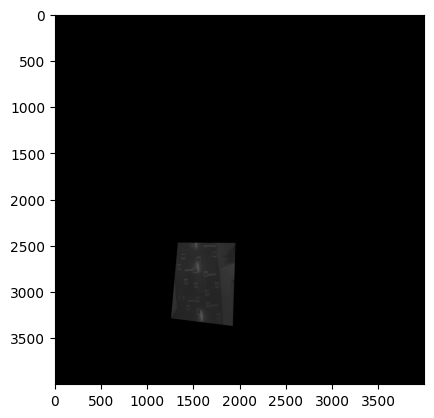

In [78]:
plt.imshow(warped_image5)

In [79]:
def intersectMatrices(mat1, mat2):
    if not (mat1.shape == mat2.shape):
        return False
    
    mask1 = mat1 != 0
    mask2 = mat2 != 0
    mat1_intersect = mat1 * mask1 * mask2
    mat2_intersect = mat2 * mask1 * mask2

    return mat1_intersect, mat2_intersect, (mat1_intersect*0.6 + mat2_intersect*0.4).astype(np.uint8), np.maximum(mat1_intersect, mat2_intersect)

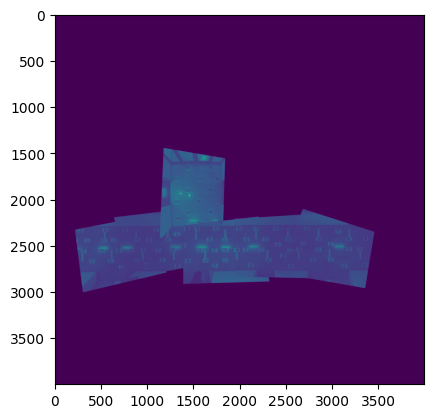

In [80]:
wrapping_image = np.zeros((LENGTH, WIDTH, 3), dtype=np.uint8)

def getIntersectedImage(images, stitch_image):

    for image in images:
        overlap1, overlap2, overlap, mimmax_overlap = intersectMatrices(stitch_image, image)
        stitch_image += image - overlap2
        # stitch_image += image - mimmax_overlap
    return stitch_image

stitched_image = getIntersectedImage(warp_images, wrapping_image)
height, width = stitched_image.shape[:2]

rotation_matrix = cv.getRotationMatrix2D((width/2, height/2), 85, 1)

stitched_image = cv.warpAffine(stitched_image, rotation_matrix, (width, height))

stitched_image = cv.flip(stitched_image, 1)

gray_img = cv.cvtColor(stitched_image, cv.COLOR_BGR2GRAY)

# gray_img = gray_img[1600:2800, 200:3500]

plt.imshow(gray_img)

In [81]:
cv.imwrite("image.png", gray_img)

True

### Benchmarking 

In [152]:
def getBenchHomographyPairs(lidar_data, image_points):
    homography_pairs = []

    for i, image_point in enumerate(image_points):
        src, dst = homographyPairs(image_point, lidar_data)
        norm_src, mat_src = normalization(src)
        norm_dst, mat_dst = normalization(dst)
        
        M1, mask1 = cv.findHomography(norm_src, norm_dst, cv.RANSAC, 0.05, maxIters=100000)
        M2, mask2 = cv.findHomography(src, dst, cv.RANSAC, 0.05, maxIters=100000)

        homography1 = np.linalg.inv(mat_dst) @ M1 @mat_src
        homography2 = M2

        homography_pairs.append([homography1, homography2])

    return np.array(homography_pairs)


In [181]:
# l-c1,  l-c2, c1-c2

def getBenchError(label1, X1, Y1, label2, X2, Y2):
    errors = []
    for i, lab1 in enumerate(label1):
        err = 0
        for j , lab2 in enumerate(label2):
            
            if lab1 == lab2:
                x1, y1 = X1[i], Y1[i]
                x2, y2 = X2[j], Y2[j]
                err = np.sqrt((x1-x2)**2 + (y1-y2)**2)
        
        errors.append(err)

    # print(np.array(errors).shape)
    return np.array(errors)

In [182]:
def benchmarks_camera(lidar_data, image_points, test_times=1000):
    error = []

    label = data[:, 0]
    X = data[:, 1]
    y = data[:, 2]

    for _ in range(test_times):
        # shuffle the image points
        train_points = []
        test_points = []

        for image_point in image_points:
            np.random.shuffle(image_point)
        
            train_points.append(image_point[:-3,:])
            test_points.append(image_point[-3:,:])

        homography_pairs = getBenchHomographyPairs(lidar_data, train_points)

        ld_errors = []
        for i, image_point in enumerate(test_points):
            im_image_point = image_point[:, 1:]
            im_label = image_point[:, 0]

            ld_image_point = getPoints(homography_pairs[i][0], im_image_point)
            ld_X, ld_Y = ld_image_point[:,0],  ld_image_point[:,1]

            ld_error = getBenchError(label, X, y, im_label, ld_X, ld_Y)
            ld_errors.append(ld_error.mean())
            # break
        
        error.append(ld_errors)
        # break

    #     error.append(im_errors)
    
    return np.array(error)


In [205]:
def plot_bar_error(image_errors):
    x_num = np.arange(1000)
    mean_error = []
    for i in range(6):
        errors = image_errors[:, i]
        mean = errors.mean()
        std = errors.std()
        mean_error.append(mean)

        plt.figure(figsize=(7,7))
        plt.bar(x_num, errors, color="blue")
        plt.grid(True)
        plt.xlabel("Iteration")
        plt.ylabel("Error in meter")
        plt.title(f"Error for image {i+1}, mean={mean} mtr, std={std}")
        plt.show()

    
    return np.array(mean_error)


In [183]:
lidar_data = getArray("intersections.txt")
sanjit_sir = getArray("new_rectified_data/rectified_csv/points00.csv")
saket_sir = getArray("new_rectified_data/rectified_csv/points01.csv")
middle = getArray("new_rectified_data/rectified_csv/points02.csv")
discussion = getArray("new_rectified_data/rectified_csv/points03.csv")
lcslab1 = getArray("new_rectified_data/rectified_csv/points04.csv")
lcslab2 = getArray("new_rectified_data/rectified_csv/points05.csv")

image_points = [sanjit_sir, saket_sir, middle, discussion, lcslab1, lcslab2]

image_errors = benchmarks_camera(lidar_data, image_points, test_times=1000)

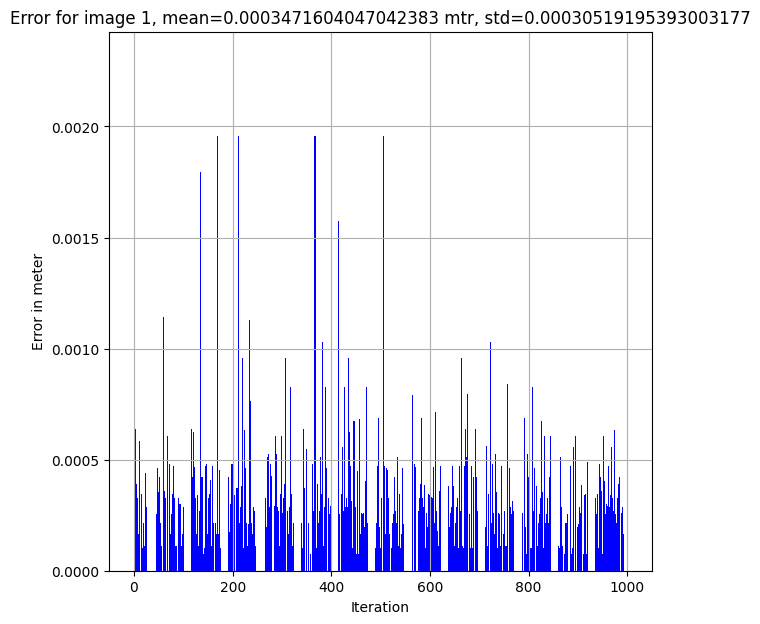

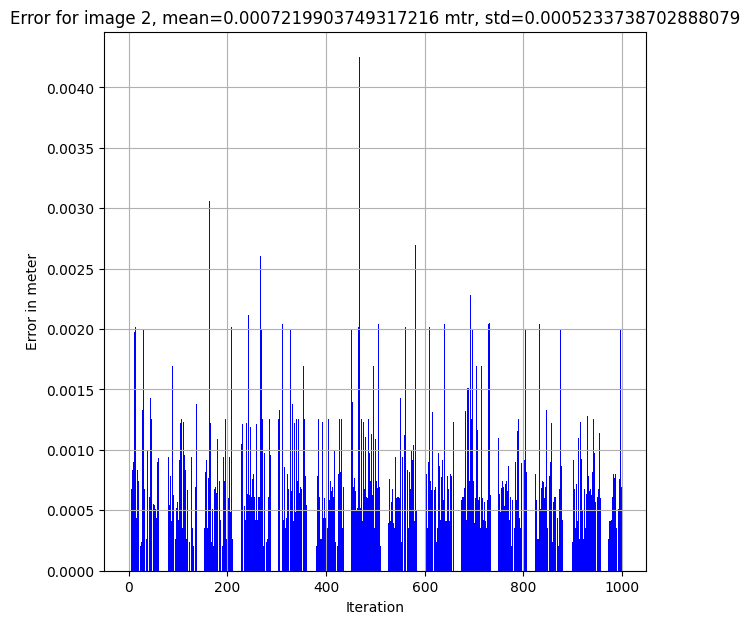

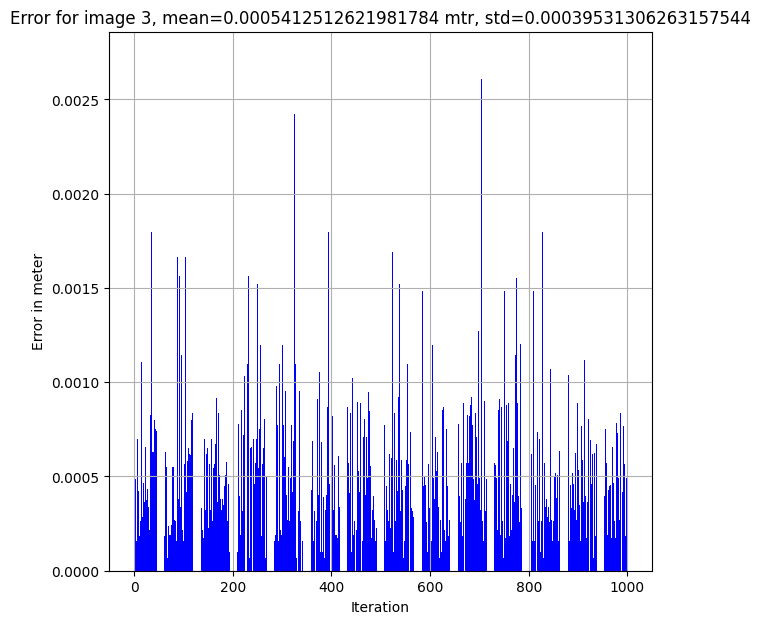

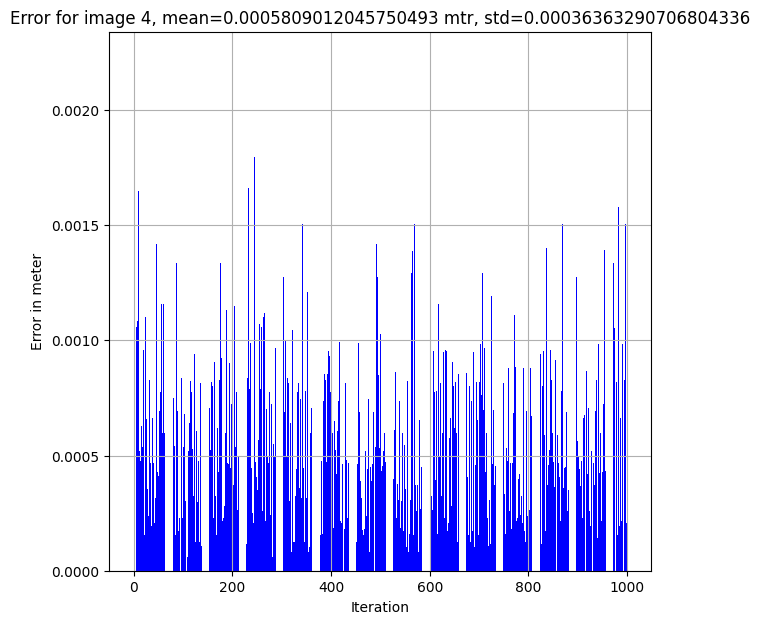

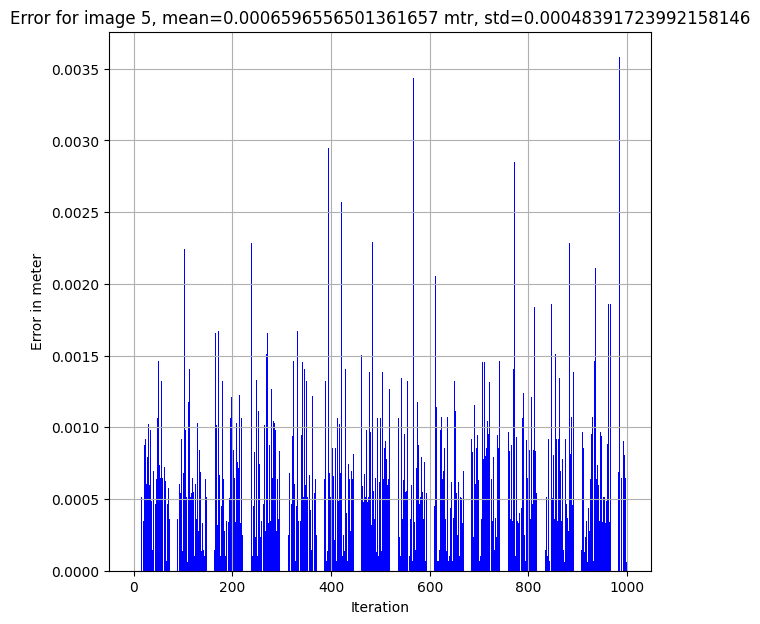

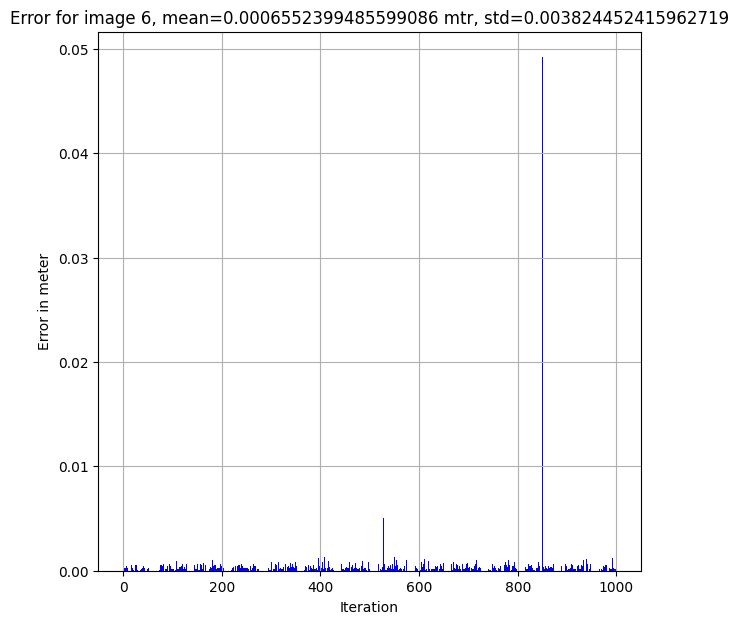

In [206]:
mean_errors = plot_bar_error(image_errors)

In [207]:
print("mean_error for each image", mean_errors)
print("std for each image", image_errors.std(axis=0))
print("mean of mean_error", mean_errors.mean())
print("std of mean_error", mean_errors.std())

mean_error for each image [0.00034716 0.00072199 0.00054125 0.0005809  0.00065966 0.00065524]
std for each image [0.00030519 0.00052337 0.00039531 0.00036363 0.00048392 0.00382445]
mean of mean_error 0.0005843664741842102
std of mean_error 0.00012094730012059665


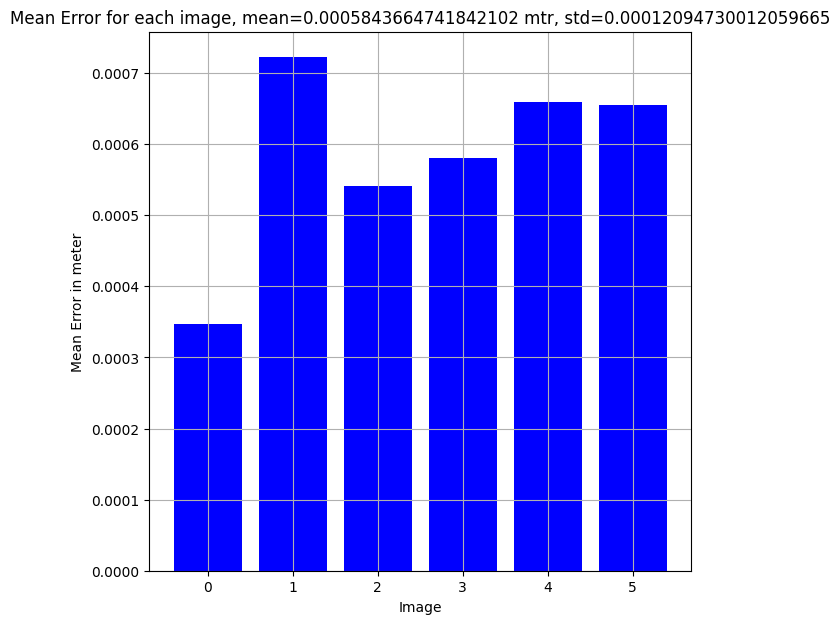

In [208]:
plt.figure(figsize=(7,7))
plt.bar(np.arange(6), mean_errors, color="blue")
plt.grid(True)
plt.xlabel("Image")
plt.ylabel("Mean Error in meter")
plt.title(f"Mean Error for each image, mean={mean_errors.mean()} mtr, std={mean_errors.std()}")
plt.show()